Do the following in the wine dataset.

Read the dataset to the python environment.

Try out different clustering models in the wine dataset.

Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data = pd.read_csv('Wine.csv')

In [5]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# K Means Clustering

In [9]:
from sklearn.preprocessing import StandardScaler
sc_data = pd.DataFrame(StandardScaler().fit_transform(data) , columns=data.columns, index =data.index)

In [10]:
from sklearn.cluster import KMeans

C:\Users\Minnu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


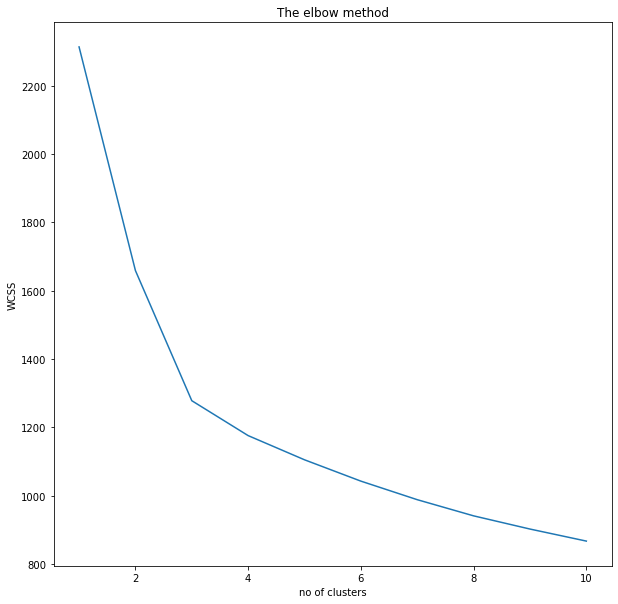

In [12]:

wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters=i , init="k-means++", random_state=42)
  kmeans.fit(sc_data)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [13]:
#This indicates no.of clusters is 3

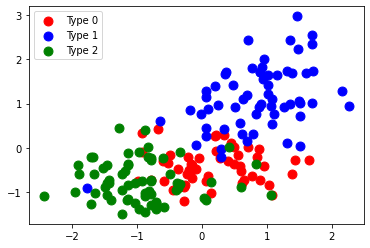

In [15]:
kmeans = KMeans(n_clusters = 3 , init ="k-means++",max_iter = 1000 ,random_state=42)
kmeans.fit(sc_data)
kmean_clusters = kmeans.labels_
plt.scatter(sc_data.iloc[kmean_clusters == 0, 0], sc_data.iloc[kmean_clusters == 0, 12], s = 80, c = 'red', label = 'Type 0')
plt.scatter(sc_data.iloc[kmean_clusters == 1, 0], sc_data.iloc[kmean_clusters == 1, 12], s = 80, c = 'blue', label = 'Type 1')
plt.scatter(sc_data.iloc[kmean_clusters == 2, 0], sc_data.iloc[kmean_clusters == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.legend()

# Dendogram

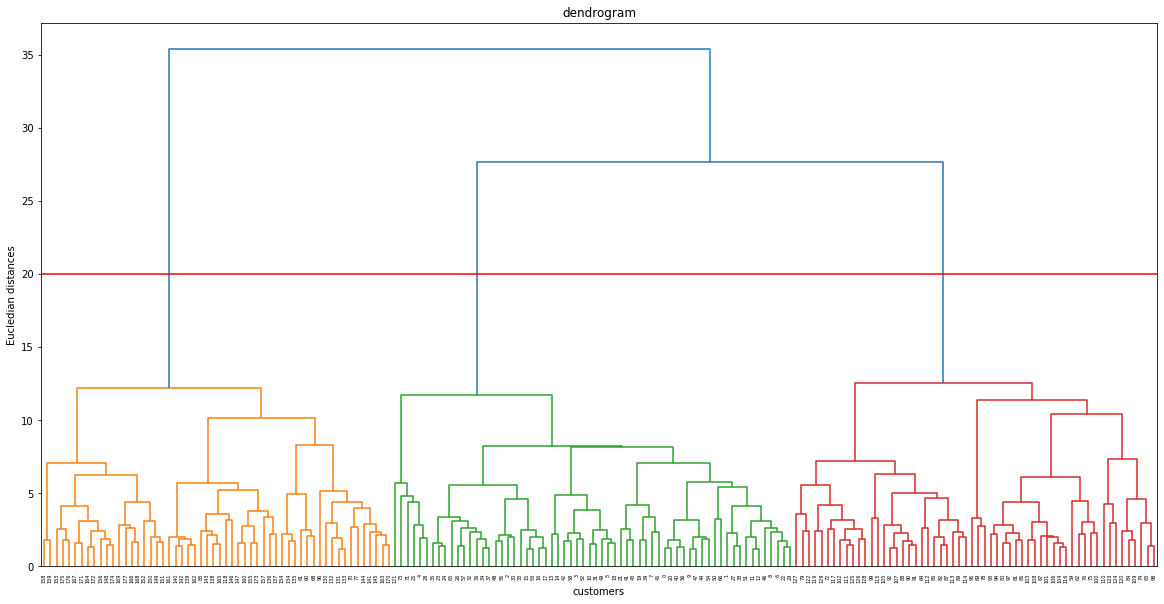

In [20]:
import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(sc_data, method = "ward"))
plt.hlines(20,0,6000,colors="red" , linestyles="solid")
plt.title("dendrogram")
plt.xlabel("customers")
plt.ylabel("Eucledian distances")
plt.show()

In [21]:
#This indicates we have 3 clusters

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")
model_hc = hc.fit(sc_data)
HC_clusters = model_hc.labels_

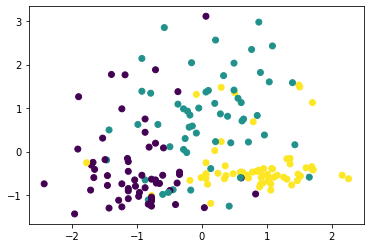

In [23]:
plt.scatter(scaled_data.iloc[:,0],sc_data.iloc[:,1],c=HC_clusters)

# PCA

In [33]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
sc_data = scalar.fit_transform(data)
sc_data = pd.DataFrame(sc_data, columns = data.columns)
sc_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
pca.fit(sc_data)
data_pca = pca.transform(sc_data)

In [35]:
pca.n_components_

10

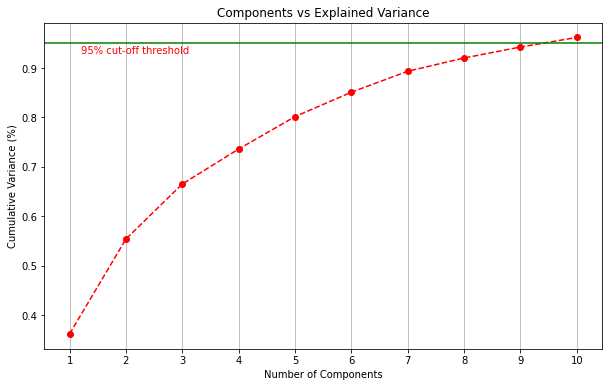

In [38]:
# Plotting the graph of Components vs Explained Variance
plt.figure(figsize = (10, 6))
x = np.arange(1, pca.n_components_+1 , step = 1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.plot(x, y, marker = "o", linestyle = "--", color = "r")
# horizontal line for 95% cutoff threshold
plt.axhline(y = 0.95, color = 'g', linestyle = "-")
plt.text(1.2, 0.93, "95% cut-off threshold", color = 'r', fontsize = 10)
plt.xticks(x)
plt.grid(axis = 'x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title("Components vs Explained Variance")
plt.show()

In [39]:
pca=PCA(n_components=3)
x_pca=pca.fit_transform(scaled_data)
pcadf=pd.DataFrame(x_pca,columns=["PC1","PC2","PC3"])
pcadf.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
